In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [26]:
data = pd.read_excel("./kosfi3.xlsx")

In [27]:
data.head()

,date,the_open,the_high,the_low,the_close,the_vol,usd_kor,nasdaq,open_by_open_1,high_by_open_1,usd_by_yes_1,nas_by_yes_1,good_bad
0,2015-12-17,10240,10405,9970,10330,946156,1183.06,5002.549805,NaN,NaN,NaN,NaN,NaN
1,2015-12-18,10230,10710,10165,10710,1841150,1180.43,4923.080078,0.999023,1.017107,1.002228,0.984114,1.0
2,2015-12-21,10695,10825,10670,10720,1274858,1173.61,4968.919922,1.045455,1.001403,1.005811,1.009311,0.0
3,2015-12-22,10740,10750,10450,10495,1374974,1169.11,5001.109863,1.004208,1.007914,1.003849,1.006478,0.0
4,2015-12-23,10535,10635,10415,10425,2532341,1172.16,5045.930176,0.980912,1.020408,0.997398,1.008962,0.0


In [28]:
data = data.dropna()
data.head()

,date,the_open,the_high,the_low,the_close,the_vol,usd_kor,nasdaq,open_by_open_1,high_by_open_1,usd_by_yes_1,nas_by_yes_1,good_bad
1,2015-12-18,10230,10710,10165,10710,1841150,1180.43,4923.080078,0.999023,1.017107,1.002228,0.984114,1.0
2,2015-12-21,10695,10825,10670,10720,1274858,1173.61,4968.919922,1.045455,1.001403,1.005811,1.009311,0.0
3,2015-12-22,10740,10750,10450,10495,1374974,1169.11,5001.109863,1.004208,1.007914,1.003849,1.006478,0.0
4,2015-12-23,10535,10635,10415,10425,2532341,1172.16,5045.930176,0.980912,1.020408,0.997398,1.008962,0.0
5,2015-12-24,10480,10525,10290,10295,1536790,1167.88,5048.490234,0.994779,1.014790,1.003665,1.000507,0.0


In [29]:
X_columns = ["open_by_open_1", "high_by_open_1", "usd_by_yes_1", "nas_by_yes_1"]
X = data[X_columns]
y_columns = ["good_bad"]
y = data[y_columns]
print(f"X shape:{X.shape}, y shape:{y.shape}")

X shape:(981, 4), y shape:(981, 1)


In [30]:
X.head()

,open_by_open_1,high_by_open_1,usd_by_yes_1,nas_by_yes_1
1,0.999023,1.017107,1.002228,0.984114
2,1.045455,1.001403,1.005811,1.009311
3,1.004208,1.007914,1.003849,1.006478
4,0.980912,1.020408,0.997398,1.008962
5,0.994779,1.014790,1.003665,1.000507


In [31]:
y.head()

,good_bad
1,1.0
2,0.0
3,0.0
4,0.0
5,0.0


In [32]:
print(X.shape, y.shape)

(981, 4) (981, 1)


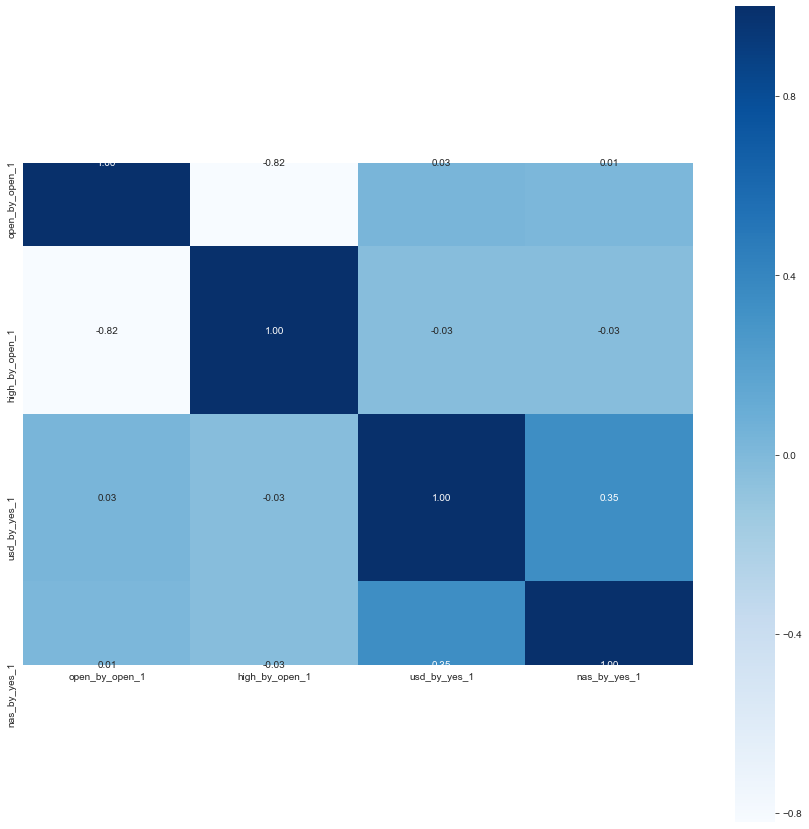

In [33]:
correlation = X.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation, annot=True, fmt = '.2f',cmap='Blues', square=True)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.2)

In [35]:
import tensorflow as tf
from tensorflow.keras import *
y_train_mlp = np.array(list(map(lambda i: [1,0] if i == 0 else [0,1], y_train)))
y_test_mlp = np.array(list(map(lambda i: [1,0] if i == 0 else [0,1], y_test)))
X_train_mlp = X_train.to_numpy()
X_test_mlp = X_test.to_numpy()

In [36]:
model = models.Sequential([
    layers.Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [37]:
model.compile(optimizer = optimizers.Adam(lr=1e-5), metrics=["accuracy"], loss='categorical_crossentropy')

In [38]:
model.fit(X_train_mlp, y_train_mlp, validation_data=(X_test_mlp, y_test_mlp), epochs=100)

Train on 784 samples, validate on 197 samples
Epoch 1/100
784/784 [==============================] - 2s 2ms/sample - loss: 0.6721 - accuracy: 0.6824 - val_loss: 0.6702 - val_accuracy: 0.6904
Epoch 2/100
784/784 [==============================] - 0s 181us/sample - loss: 0.6702 - accuracy: 0.6824 - val_loss: 0.6682 - val_accuracy: 0.6904
Epoch 3/100
784/784 [==============================] - 0s 190us/sample - loss: 0.6683 - accuracy: 0.6824 - val_loss: 0.6663 - val_accuracy: 0.6904
Epoch 4/100
784/784 [==============================] - 0s 209us/sample - loss: 0.6666 - accuracy: 0.6824 - val_loss: 0.6646 - val_accuracy: 0.6904
Epoch 5/100
784/784 [==============================] - 0s 210us/sample - loss: 0.6649 - accuracy: 0.6824 - val_loss: 0.6627 - val_accuracy: 0.6904
Epoch 6/100
784/784 [==============================] - 0s 212us/sample - loss: 0.6632 - accuracy: 0.6824 - val_loss: 0.6610 - val_accuracy: 0.6904
Epoch 7/100
784/784 [==============================] - 0s 222us/sample - l

784/784 [==============================] - 0s 220us/sample - loss: 0.6293 - accuracy: 0.6824 - val_loss: 0.6248 - val_accuracy: 0.6904
Epoch 57/100
784/784 [==============================] - 0s 209us/sample - loss: 0.6291 - accuracy: 0.6824 - val_loss: 0.6246 - val_accuracy: 0.6904
Epoch 58/100
784/784 [==============================] - 0s 221us/sample - loss: 0.6289 - accuracy: 0.6824 - val_loss: 0.6244 - val_accuracy: 0.6904
Epoch 59/100
784/784 [==============================] - 0s 217us/sample - loss: 0.6288 - accuracy: 0.6824 - val_loss: 0.6241 - val_accuracy: 0.6904
Epoch 60/100
784/784 [==============================] - 0s 210us/sample - loss: 0.6286 - accuracy: 0.6824 - val_loss: 0.6240 - val_accuracy: 0.6904
Epoch 61/100
784/784 [==============================] - 0s 218us/sample - loss: 0.6284 - accuracy: 0.6824 - val_loss: 0.6237 - val_accuracy: 0.6904
Epoch 62/100
784/784 [==============================] - 0s 222us/sample - loss: 0.6283 - accuracy: 0.6824 - val_loss: 0.6236 

In [39]:
model.predict(X_test_mlp)

array([[0.6667571 , 0.3332428 ],
       [0.6674001 , 0.33259988],
       [0.6686037 , 0.33139622],
       [0.6721732 , 0.3278268 ],
       [0.6695488 , 0.3304512 ],
       [0.6689822 , 0.33101773],
       [0.6680274 , 0.3319725 ],
       [0.6694827 , 0.33051726],
       [0.6687015 , 0.3312984 ],
       [0.6671477 , 0.33285233],
       [0.6696075 , 0.33039245],
       [0.66710895, 0.33289108],
       [0.6687525 , 0.33124748],
       [0.6699246 , 0.33007535],
       [0.66456753, 0.33543244],
       [0.6698947 , 0.33010533],
       [0.66563827, 0.3343617 ],
       [0.66854066, 0.33145934],
       [0.6674538 , 0.33254611],
       [0.66941345, 0.33058655],
       [0.6688597 , 0.3311402 ],
       [0.66411775, 0.33588225],
       [0.66884416, 0.33115578],
       [0.6688757 , 0.3311243 ],
       [0.6654708 , 0.33452916],
       [0.6711626 , 0.32883736],
       [0.6693407 , 0.3306593 ],
       [0.66834164, 0.33165833],
       [0.66652405, 0.33347598],
       [0.66787416, 0.33212587],
       [0.

In [40]:
a = np.array([[1.11,1.11,1.11,1.11]])
model.predict(a)

array([[0.68334174, 0.31665826]], dtype=float32)

In [42]:
y_test

array([0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0.])